In [29]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
h15 = pd.read_csv('2015.csv', on_bad_lines='skip')

h15 = h15.round(2)

In [31]:
h16 = pd.read_csv('2016.csv', on_bad_lines='skip')
h16.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1, inplace=True)

h16 = h16.round(2)

In [32]:
h17 = pd.read_csv('2017.csv', on_bad_lines='skip')
h17.drop(['Whisker.high', 'Whisker.low'], axis=1, inplace=True)
h17 = h17.round(2)

region_df = pd.read_csv('2016.csv')
h17['Country'] = h17['Country'].str.strip()
region_df['Country'] = region_df['Country'].str.strip()
h17 = pd.merge(h17, region_df[['Country', 'Region']], on='Country', how='left')

In [33]:
h18 = pd.read_csv('2018.csv', on_bad_lines='skip')
h18 = h18.rename(columns={
    'GDP per capita': 'Economy (GDP per Capita)',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Country or region': 'Country',
    'Score' : 'Happiness Score'
})
region_df = pd.read_csv('2016.csv')
h18['Country'] = h18['Country'].str.strip()
region_df['Country'] = region_df['Country'].str.strip()
h18 = pd.merge(h18, region_df[['Country', 'Region']], on='Country', how='left')
h18 = h18.round(2)

In [34]:
h19 = pd.read_csv('2019.csv', on_bad_lines='skip')
h19 = h19.rename(columns={
    'GDP per capita': 'Economy (GDP per Capita)',
    'Healthy life expectancy': 'Health (Life Expectancy)',
    'Freedom to make life choices': 'Freedom',
    'Country or region': 'Country',
    'Score' : 'Happiness Score'
})
region_df = pd.read_csv('2016.csv')
h19['Country'] = h19['Country'].str.strip()
region_df['Country'] = region_df['Country'].str.strip()
h19 = pd.merge(h19, region_df[['Country', 'Region']], on='Country', how='left')
h19 = h19.round(2)

1- Top 10 Countries by Average Happiness Score (2015-2019)

In [35]:
h15['Happiness Score'] = h15['Happiness Score']
h16['Happiness Score'] = h16['Happiness Score']
h17['Happiness Score'] = h17['Happiness.Score']
h18['Happiness Score'] = h18['Happiness Score']
h19['Happiness Score'] = h19['Happiness Score']
h15['Year'] = 2015
h16['Year'] = 2016
h17['Year'] = 2017
h18['Year'] = 2018
h19['Year'] = 2019
h15_data = h15[['Country', 'Happiness Score', 'Year']]
h16_data = h16[['Country', 'Happiness Score', 'Year']]
h17_data = h17[['Country', 'Happiness Score', 'Year']]
h18_data = h18[['Country', 'Happiness Score', 'Year']]
h19_data = h19[['Country', 'Happiness Score', 'Year']]
all_data = pd.concat([h15_data, h16_data, h17_data, h18_data, h19_data], ignore_index=True)
mean_happiness = all_data.groupby('Country')['Happiness Score'].mean().reset_index()
mean_happiness = mean_happiness.sort_values(by='Happiness Score', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=mean_happiness.head(10), y='Country', x='Happiness Score', palette='Blues_d')
plt.title('Top 10 Countries by Average Happiness Score (2015-2019)')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4568\41144591.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_happiness.head(10), y='Country', x='Happiness Score', palette='Blues_d')


2- Average Happiness Score (2015-2019)

2015: 5.326
2016: 5.382
2017: 5.354
2018: 5.376
2019: 5.407


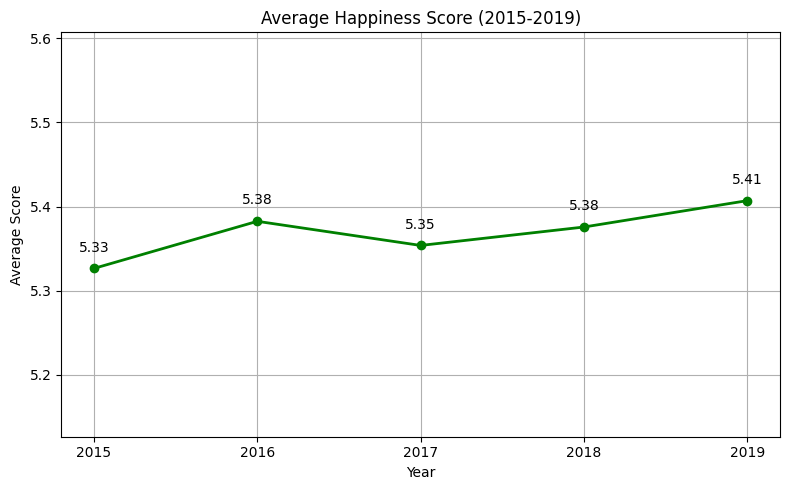

In [36]:
mean_2015 = h15['Happiness Score'].mean()
mean_2016 = h16['Happiness Score'].mean()
mean_2017 = h17['Happiness Score'].mean()
mean_2018 = h18['Happiness Score'].mean()
mean_2019 = h19['Happiness Score'].mean()

years = [2015, 2016, 2017, 2018, 2019]
means = [mean_2015, mean_2016, mean_2017, mean_2018, mean_2019]
overall_mean = sum(means) / len(means)

for y, m in zip(years, means):
    print(f"{y}: {m:.3f}")

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', linestyle='-', color='green', linewidth=2)
plt.xticks(years)
plt.title("Average Happiness Score (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.grid(True)
plt.ylim(min(means) - 0.2, max(means) + 0.2)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.02, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()



3- Average Economy (2015-2019)

In [38]:
econ_2015 = h15['Economy (Gr Capita)'].mean()
econ_2016 = h16['Economy (GDP per Capita)'].mean()
econ_2017 = h17['Economy..GDP.per.Capita.'].mean()
econ_2018 = h18['Economy (GDP per Capita)'].mean()
econ_2019 = h19['Economy (GDP per Capita)'].mean()

years = [2015, 2016, 2017, 2018, 2019]
means = [econ_2015, econ_2016, econ_2017, econ_2018, econ_2019]

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', color='blue', linewidth=2)
plt.xticks(years)
plt.title("Average Economy (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.01, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()


4- Average Health (Life Expectancy) (2015-2019)

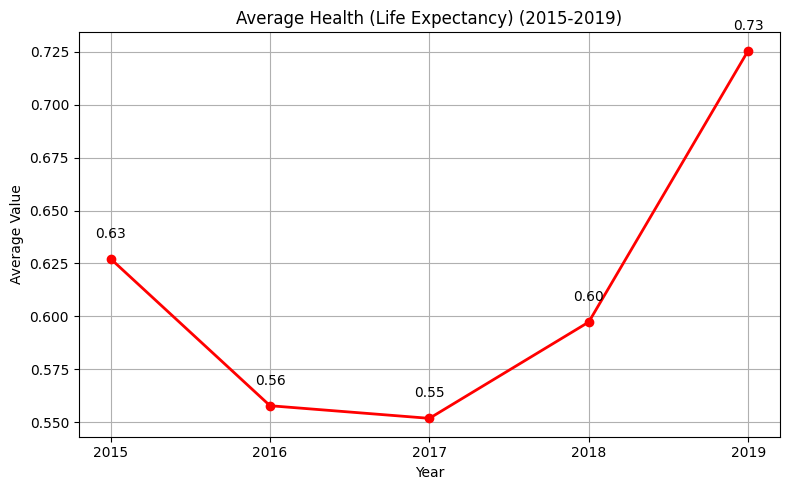

In [39]:
health_2015 = h15['Health (Life Expectancy)'].mean()
health_2016 = h16['Health (Life Expectancy)'].mean()
health_2017 = h17['Health..Life.Expectancy.'].mean()
health_2018 = h18['Health (Life Expectancy)'].mean()
health_2019 = h19['Health (Life Expectancy)'].mean()

years = [2015, 2016, 2017, 2018, 2019]
means = [health_2015, health_2016, health_2017, health_2018, health_2019]

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', color='red', linewidth=2)
plt.xticks(years)
plt.title("Average Health (Life Expectancy) (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.01, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()


5- Average Freedom (2015-2019)

In [40]:
freedom_2015 = h15['Freedom'].mean()
freedom_2016 = h16['Freedom'].mean()
freedom_2017 = h17['Freedom'].mean()
freedom_2018 = h18['Freedom'].mean()
freedom_2019 = h19['Freedom'].mean()

years = [2015, 2016, 2017, 2018, 2019]
means = [freedom_2015, freedom_2016, freedom_2017, freedom_2018, freedom_2019]

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', color='green', linewidth=2)
plt.xticks(years)
plt.title("Average Freedom (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.005, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()


6- Average Generosity (2015-2019)

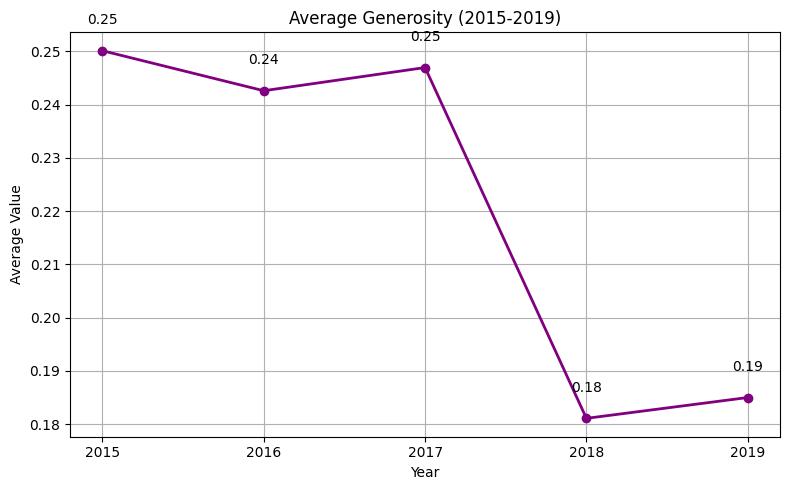

In [41]:
gen_2015 = h15['Generosity'].mean()
gen_2016 = h16['Generosity'].mean()
gen_2017 = h17['Generosity'].mean()
gen_2018 = h18['Generosity'].mean()
gen_2019 = h19['Generosity'].mean()

years = [2015, 2016, 2017, 2018, 2019]
means = [gen_2015, gen_2016, gen_2017, gen_2018, gen_2019]

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', color='purple', linewidth=2)
plt.xticks(years)
plt.title("Average Generosity (2015-2019)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.005, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()


7- Average Family/Social Support (2015–2019)

In [45]:
fam_2015 = h15['Family'].mean()
fam_2016 = h16['Family'].mean()
fam_2017 = h17['Family'].mean()
fam_2018 = h18['Social support'].mean()
fam_2019 = h19['Social support'].mean()

years = [2015, 2016, 2017, 2018, 2019]
means = [fam_2015, fam_2016, fam_2017, fam_2018, fam_2019]

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', color='orange', linewidth=2)
plt.xticks(years)
plt.title("Average Family/Social Support (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.01, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()



8- Average Dystopia Residual (2015-2017)

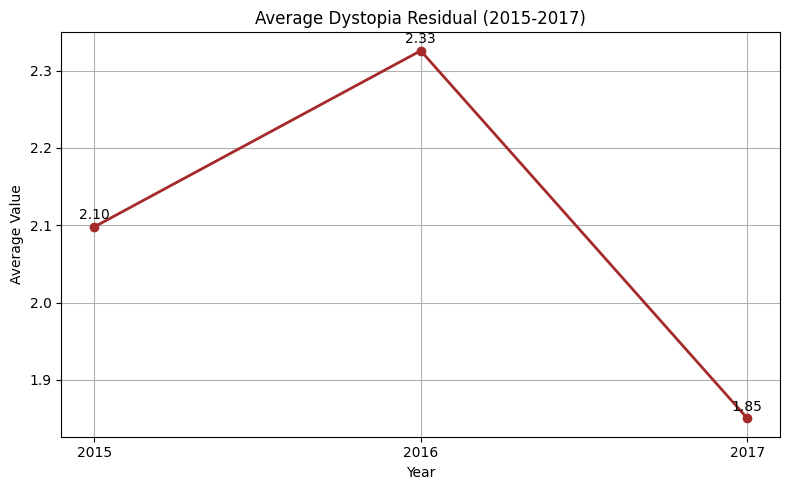

In [44]:
dys_2015 = h15['Dystopia ResidualDP pe'].mean()
dys_2016 = h16['Dystopia Residual'].mean()
dys_2017 = h17['Dystopia.Residual'].mean()

years = [2015, 2016, 2017]
means = [dys_2015, dys_2016, dys_2017]

plt.figure(figsize=(8, 5))
plt.plot(years, means, marker='o', color='brown', linewidth=2)
plt.xticks(years)
plt.title("Average Dystopia Residual (2015-2017)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.grid(True)
for i in range(len(years)):
    plt.text(years[i], means[i] + 0.01, f"{means[i]:.2f}", ha='center')
plt.tight_layout()
plt.show()


9- Top Region per Feature (Average 2015–2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\1573286073.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Feature', data=summary, palette='mako')


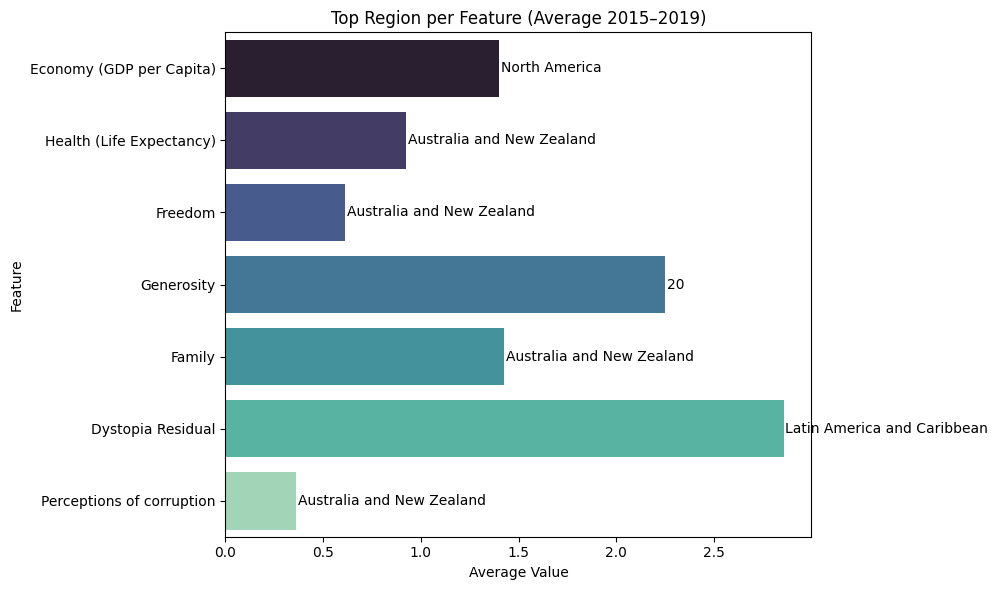

In [49]:

for df in [h15, h16, h17, h18, h19]:
    df.rename(columns={
        'Economy (Gr Capita)': 'Economy (GDP per Capita)',
        'Social support': 'Family',
        'Trust (Government Corruption)': 'Perceptions of corruption'
    }, inplace=True)

all_years = pd.concat([h15, h16, h17, h18, h19], ignore_index=True)

features = [
    'Economy (GDP per Capita)',
    'Health (Life Expectancy)',
    'Freedom',
    'Generosity',
    'Family',
    'Dystopia Residual',
    'Perceptions of corruption'
]

region_feature_avg = all_years.groupby('Region')[features].mean()

top_regions = region_feature_avg.idxmax()
top_values = region_feature_avg.max()

summary = pd.DataFrame({
    'Feature': features,
    'Top Region': [top_regions[f] for f in features],
    'Value': [top_values[f] for f in features]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Feature', data=summary, palette='mako')
for i in range(len(summary)):
    plt.text(summary['Value'][i] + 0.01, i, summary['Top Region'][i], va='center')
plt.title('Top Region per Feature (Average 2015–2019)')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


10- Top 10 Countries by Economy (2015 - 2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\1858367494.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top, palette='Blues_d')


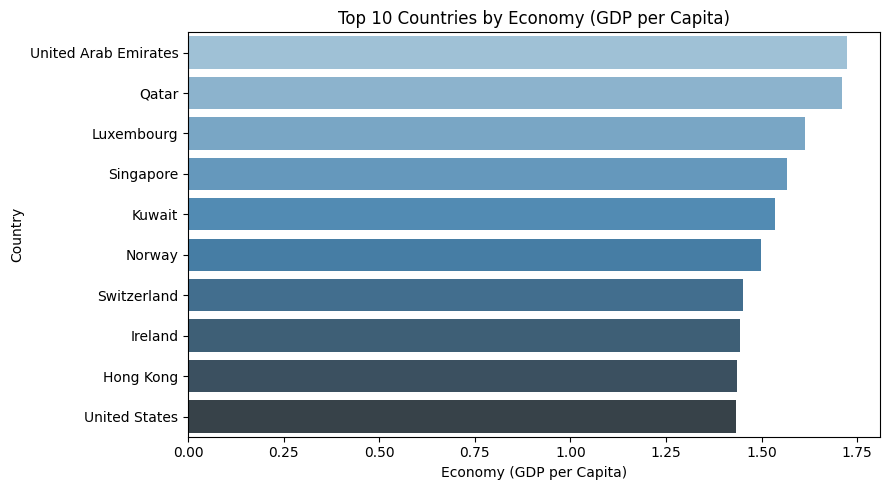

In [50]:

df_all = pd.concat([h15, h16, h17, h18, h19], ignore_index=True)

top = df_all[['Country', 'Economy (GDP per Capita)']].groupby('Country').mean().sort_values(by='Economy (GDP per Capita)', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Economy (GDP per Capita)', y='Country', data=top, palette='Blues_d')
plt.title('Top 10 Countries by Economy (GDP per Capita)')
plt.tight_layout()
plt.show()


11- Top 10 Countries by Health (2015 - 2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\3753579829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health (Life Expectancy)', y='Country', data=top, palette='Greens_d')


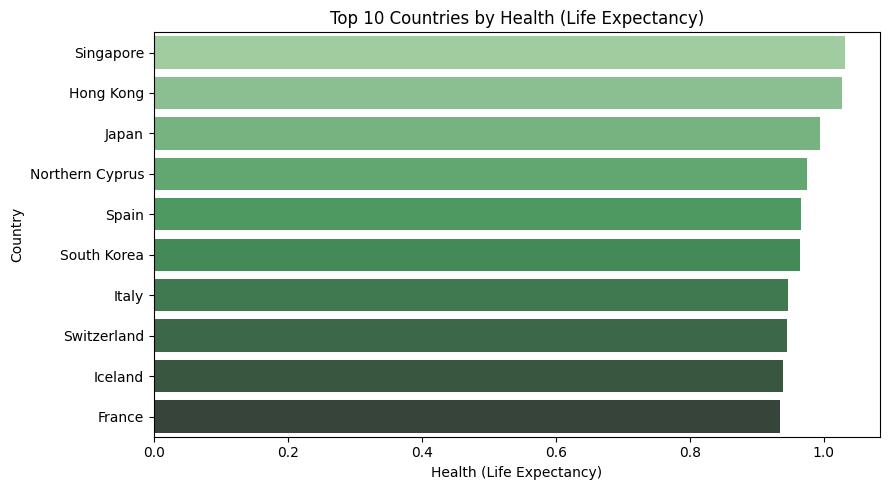

In [51]:
top = df_all[['Country', 'Health (Life Expectancy)']].groupby('Country').mean().sort_values(by='Health (Life Expectancy)', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Health (Life Expectancy)', y='Country', data=top, palette='Greens_d')
plt.title('Top 10 Countries by Health (Life Expectancy)')
plt.tight_layout()
plt.show()


12- Top 10 Countries by Freedom (2015 - 2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\2187807891.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freedom', y='Country', data=top, palette='Oranges_d')


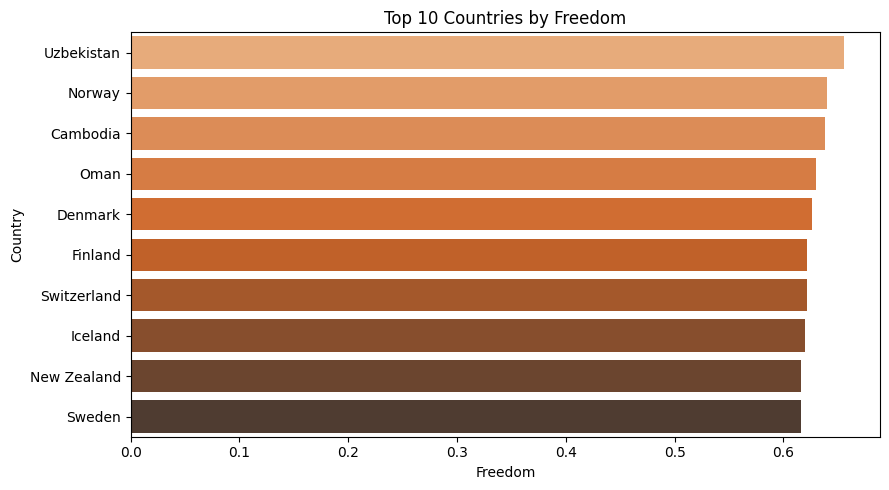

In [52]:
top = df_all[['Country', 'Freedom']].groupby('Country').mean().sort_values(by='Freedom', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Freedom', y='Country', data=top, palette='Oranges_d')
plt.title('Top 10 Countries by Freedom')
plt.tight_layout()
plt.show()


13- Top 10 Countries by Generosity(2015 - 2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\3175363881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generosity', y='Country', data=top, palette='Purples_d')


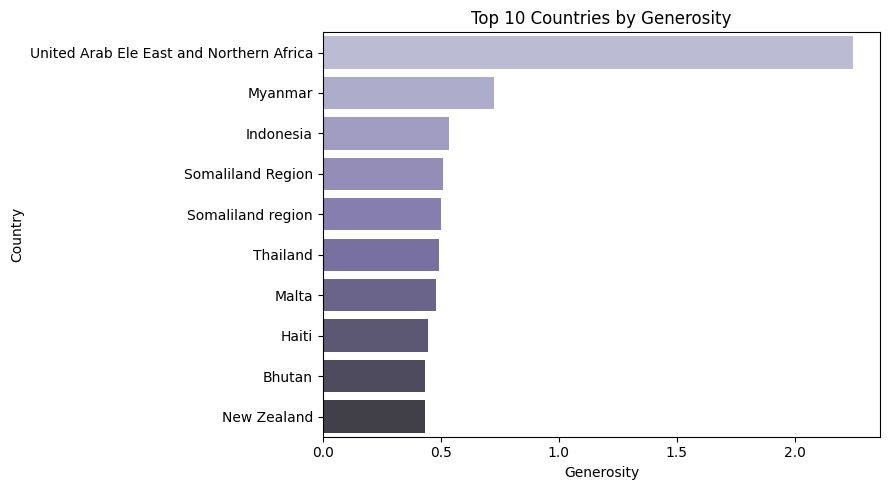

In [53]:
top = df_all[['Country', 'Generosity']].groupby('Country').mean().sort_values(by='Generosity', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Generosity', y='Country', data=top, palette='Purples_d')
plt.title('Top 10 Countries by Generosity')
plt.tight_layout()
plt.show()


14- Top 10 Countries by Family(2015 - 2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\728966024.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family', y='Country', data=top, palette='Reds_d')


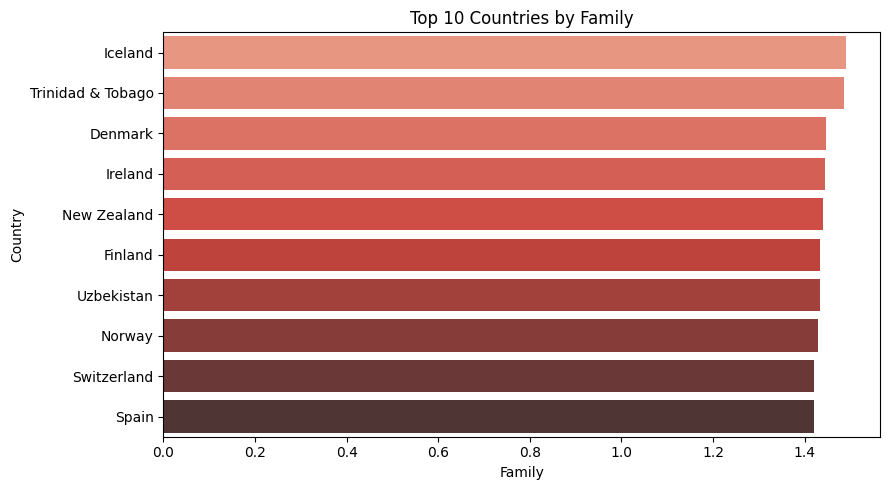

In [54]:
top = df_all[['Country', 'Family']].groupby('Country').mean().sort_values(by='Family', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Family', y='Country', data=top, palette='Reds_d')
plt.title('Top 10 Countries by Family')
plt.tight_layout()
plt.show()


15- Top 10 Countries by Dystopia Residual(2015 - 2017)

In [55]:
top = df_all[['Country', 'Dystopia Residual']].groupby('Country').mean().sort_values(by='Dystopia Residual', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Dystopia Residual', y='Country', data=top, palette='cividis')
plt.title('Top 10 Countries by Dystopia Residual')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_4568\3862977305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dystopia Residual', y='Country', data=top, palette='cividis')


16- Top 10 Countries by Perceptions of Corruption(2018/2019)

C:\Users\User\AppData\Local\Temp\ipykernel_4568\2318581501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perceptions of corruption', y='Country', data=top, palette='YlOrBr')


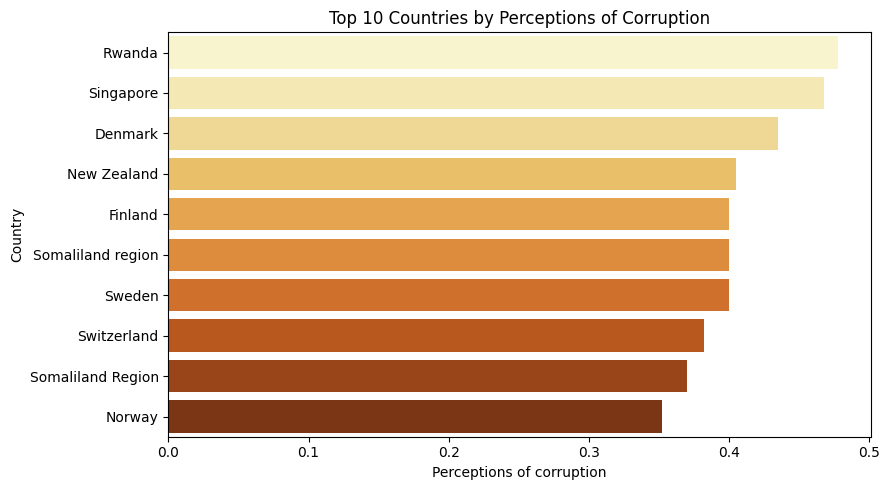

In [56]:
top = df_all[['Country', 'Perceptions of corruption']].groupby('Country').mean().sort_values(by='Perceptions of corruption', ascending=False).head(10).reset_index()

plt.figure(figsize=(9, 5))
sns.barplot(x='Perceptions of corruption', y='Country', data=top, palette='YlOrBr')
plt.title('Top 10 Countries by Perceptions of Corruption')
plt.tight_layout()
plt.show()


17- Sub-Saharan Africa - Feature Trends (2015–2019)

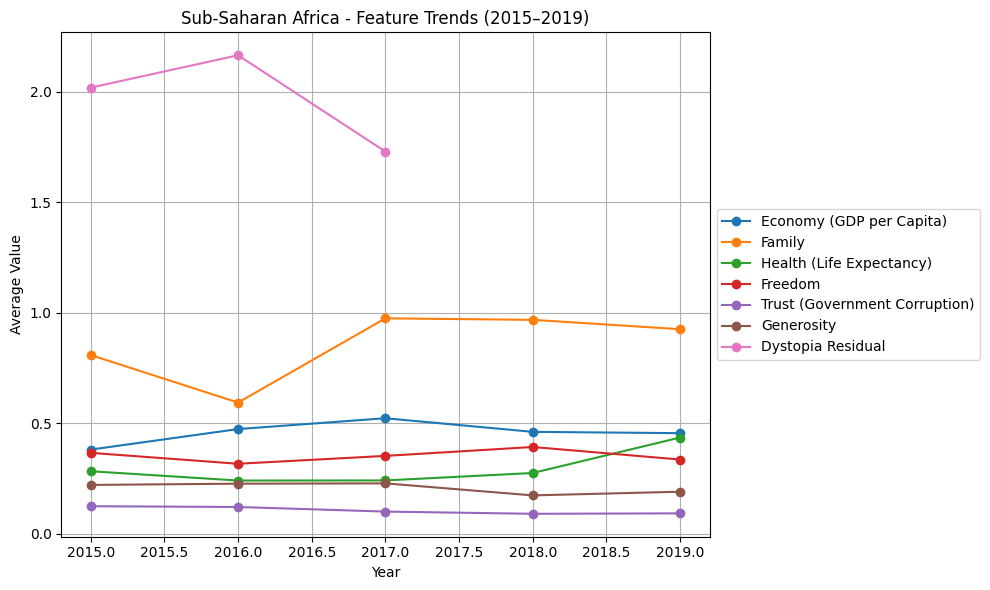

In [80]:
dataframes = [h15, h16, h17, h18, h19]
years = [2015, 2016, 2017, 2018, 2019]

columns_map = {
    'Economy (Gr Capita)': 'Economy (GDP per Capita)',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Social support': 'Family',
    'Health..Life.Expectancy.': 'Health (Life Expectancy)',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
    'Happiness.Score': 'Happiness Score',
    'Happiness.Rank': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',
    'Dystopia ResidualDP pe': 'Dystopia Residual',
    'Dystopia.Residual': 'Dystopia Residual'
}

features = [
    'Economy (GDP per Capita)',
    'Family',
    'Health (Life Expectancy)',
    'Freedom',
    'Trust (Government Corruption)',
    'Generosity',
    'Dystopia Residual'
]

for i in range(len(dataframes)):
    df = dataframes[i].copy()
    df.columns = [columns_map.get(col, col) for col in df.columns]
    dataframes[i] = df

data_dict = {feature: [] for feature in features}

for i, df in enumerate(dataframes):
    region_df = df[df['Region'] == 'Sub-Saharan Africa']
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title('Sub-Saharan Africa - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


18- Central and Eastern Europe - Feature Trends (2015–2019)

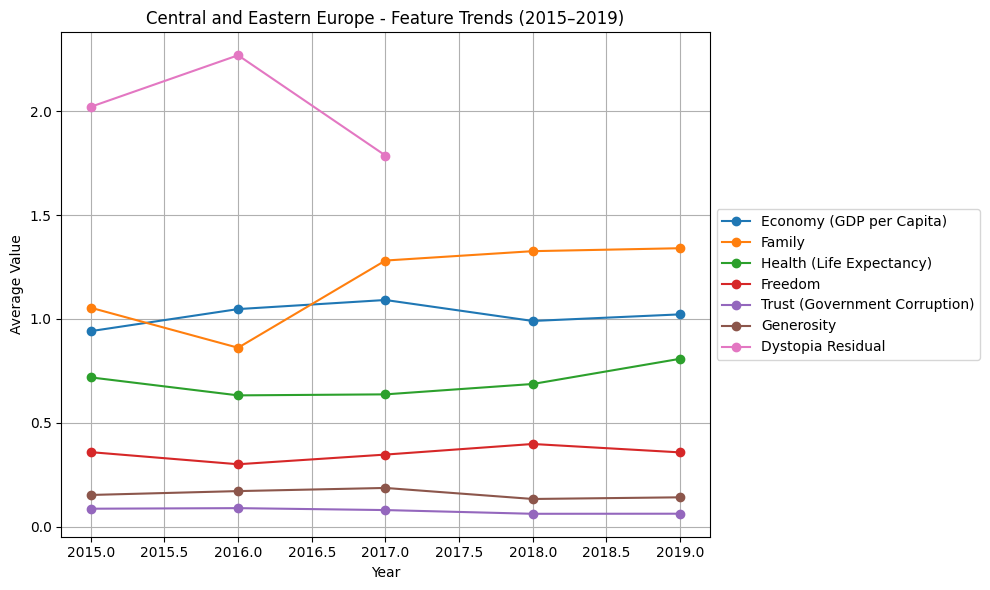

In [68]:
region = 'Central and Eastern Europe'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


19- Latin America and Caribbean - Feature Trends (2015–2019)

In [69]:
region = 'Latin America and Caribbean'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


20- Western Europe - Feature Trends (2015–2019)

In [71]:
region = 'Western Europe'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


21- Middle East and Northern Africa - Feature Trends (2015–2019)

In [72]:
region = 'Middle East and Northern Africa'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


22- Southeastern Asia - Feature Trends (2015–2019)

In [75]:
region = 'Southeastern Asia'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


23- Southern Asia - Feature Trends (2015–2019)

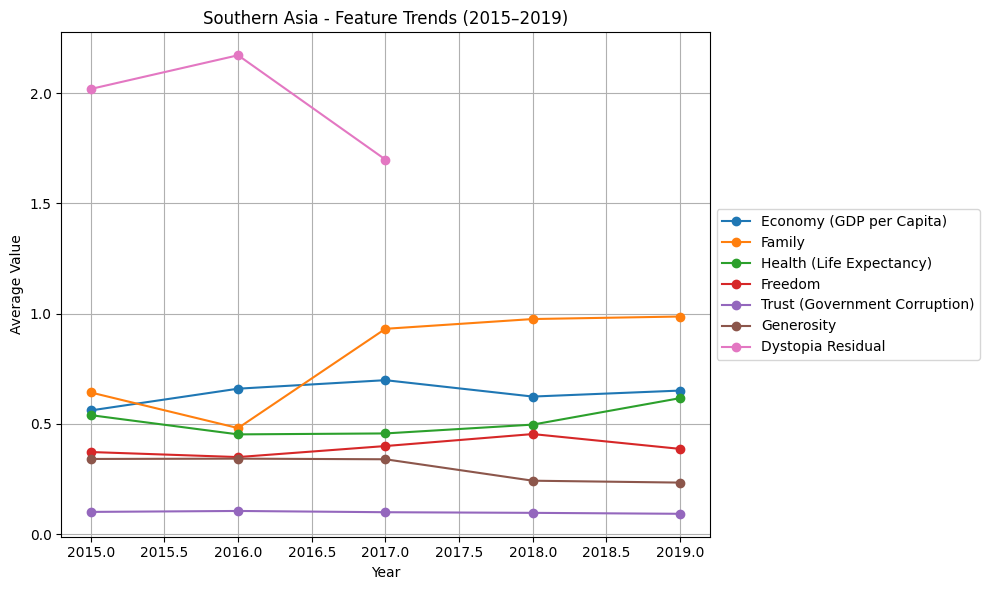

In [76]:
region = 'Southern Asia'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


24- Eastern Asia - Feature Trends (2015–2019)

In [77]:
region = 'Eastern Asia'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


25- North America - Feature Trends (2015–2019)

In [78]:
region = 'North America'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


26- Australia and New Zealand - Feature Trends (2015–2019)

In [79]:
region = 'Australia and New Zealand'

data_dict = {feature: [] for feature in features}

for df in dataframes:
    region_df = df[df['Region'] == region]
    for feature in features:
        mean_value = region_df[feature].mean() if feature in region_df.columns else None
        data_dict[feature].append(mean_value)

plot_df = pd.DataFrame(data_dict, index=years)

plt.figure(figsize=(10, 6))
for feature in features:
    plt.plot(
        plot_df.index[plot_df[feature].notna()],
        plot_df[feature].dropna(),
        marker='o',
        label=feature
    )

plt.title(f'{region} - Feature Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


27- Top 10 Most Frequent Countries in Top 10 Happiness Rank (2015–2019)

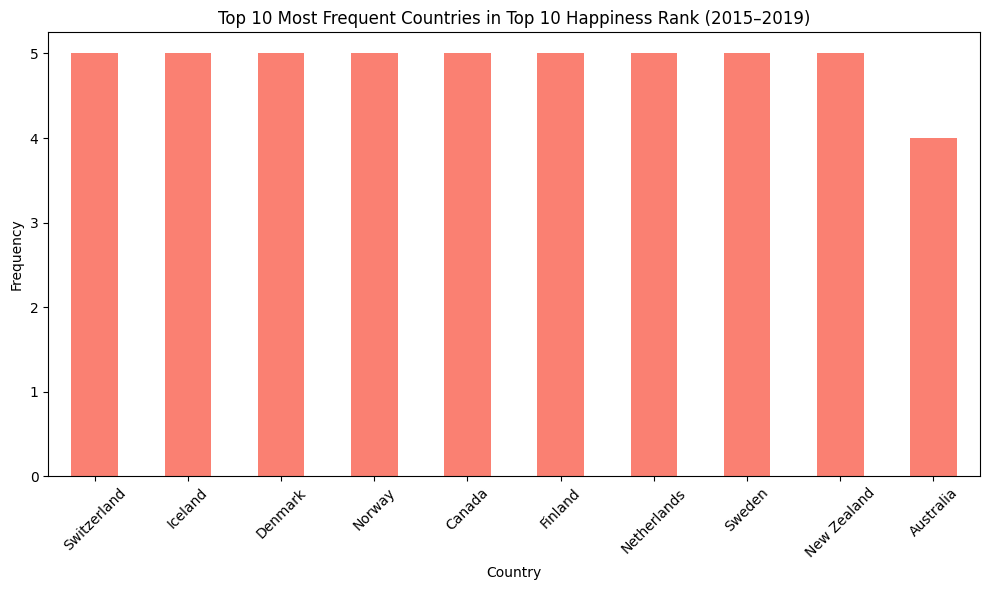

In [86]:

all_dfs = []

for i in range(len(dataframes)):
    df = dataframes[i].copy()
    df.columns = [columns_map.get(col, col) for col in df.columns]
    df = df.loc[:, ~df.columns.duplicated()]
    df['Year'] = years[i]
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df['Happiness Rank'] = pd.to_numeric(combined_df['Happiness Rank'], errors='coerce')
top10_df = combined_df[combined_df['Happiness Rank'] <= 10]
top10_counts = top10_df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top10_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Frequent Countries in Top 10 Happiness Rank (2015–2019)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


28- Top 10 Most Frequent Regions in Top 10 Happiness Rank (2015–2019)

In [87]:
all_dfs = []

for i in range(len(dataframes)):
    df = dataframes[i].copy()
    df.columns = [columns_map.get(col, col) for col in df.columns]
    df = df.loc[:, ~df.columns.duplicated()]
    df['Year'] = years[i]
    all_dfs.append(df)

combined_df = pd.concat(all_dfs, ignore_index=True)
combined_df['Happiness Rank'] = pd.to_numeric(combined_df['Happiness Rank'], errors='coerce')
top10_df = combined_df[combined_df['Happiness Rank'] <= 10]
top10_counts_region = top10_df['Region'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top10_counts_region.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequent Regions in Top 10 Happiness Rank (2015–2019)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


29- Top Ranked Country Happiness Score (2015–2019)

In [93]:
columns_map = {
    'Overall rank': 'Happiness Rank',
    'Happiness.Score': 'Happiness Score',
    'Score': 'Happiness Score',
    'Happiness score': 'Happiness Score',
    'Happiness Score': 'Happiness Score'
}

top1_countries = []
scores = []
years = []

for df, year in zip(all_dfs, [2015, 2016, 2017, 2018, 2019]):

    df.columns = [columns_map.get(col, col) for col in df.columns]
    
 
    df['Happiness Rank'] = pd.to_numeric(df['Happiness Rank'], errors='coerce')
    
    if 'Happiness Score' in df.columns:
        df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')
    else:
        continue 

    top1 = df[df['Happiness Rank'] == 1].iloc[0]
    top1_countries.append(top1['Country'])
    scores.append(top1['Happiness Score'])
    years.append(year)


plt.figure(figsize=(8, 5))
plt.plot(years, scores, marker='o', linestyle='-', color='green')

for i, year in enumerate(years):
    plt.text(year, scores[i] + 0.03, top1_countries[i], ha='center', fontsize=9)

plt.title("Top Ranked Country Happiness Score (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()



30- Top Country by Region (Average Score over 5 Years)

In [96]:
all_data = []

for df, year in zip(all_dfs, [2015, 2016, 2017, 2018, 2019]):
    df = df.copy()
    df.columns = [columns_map.get(col.strip(), col.strip()) for col in df.columns]
    df['Year'] = year
    df['Happiness Score'] = pd.to_numeric(df['Happiness Score'], errors='coerce')
    all_data.append(df[['Country', 'Region', 'Happiness Score', 'Year']])

merged = pd.concat(all_data)
merged = merged.dropna(subset=['Region', 'Happiness Score'])

avg_scores = merged.groupby(['Region', 'Country'])['Happiness Score'].mean().reset_index()
top_avg = avg_scores.loc[avg_scores.groupby('Region')['Happiness Score'].idxmax()]

plt.figure(figsize=(10, 6))
plt.barh(top_avg['Region'], top_avg['Happiness Score'], color='green')

for i, row in top_avg.iterrows():
    plt.text(row['Happiness Score'] + 0.05, row['Region'], row['Country'], va='center')

plt.xlabel("Average Happiness Score (2015–2019)")
plt.title("Top Country by Region (Average Score over 5 Years)")
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()
